## Message Queue
* This notebook is from [a youtube video](https://www.youtube.com/watch?v=5BdGCANeV2o&t=405s)

### wha is a message queue?
* A message queue is a queue of messages sent between applications
* It includes a sequence of work objects that are waiting to be processed
* A message is the data transported between the sender and the receiver applications
* It is essentially a byte array with some headers at the top for Inter Process Communication (IPC)
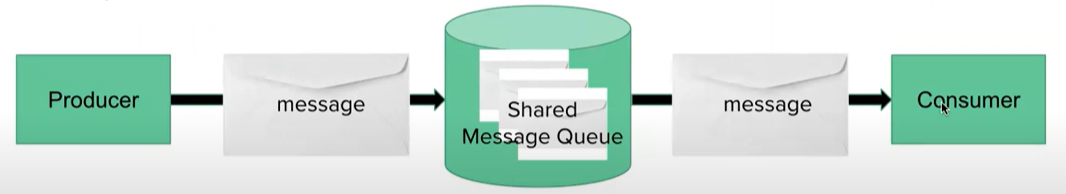

### Example 1. Unique Id Generation and distribution
* a generator service may support several services and become the single point of failure
* the solution is to add a message queue between the generator and services, as shown below

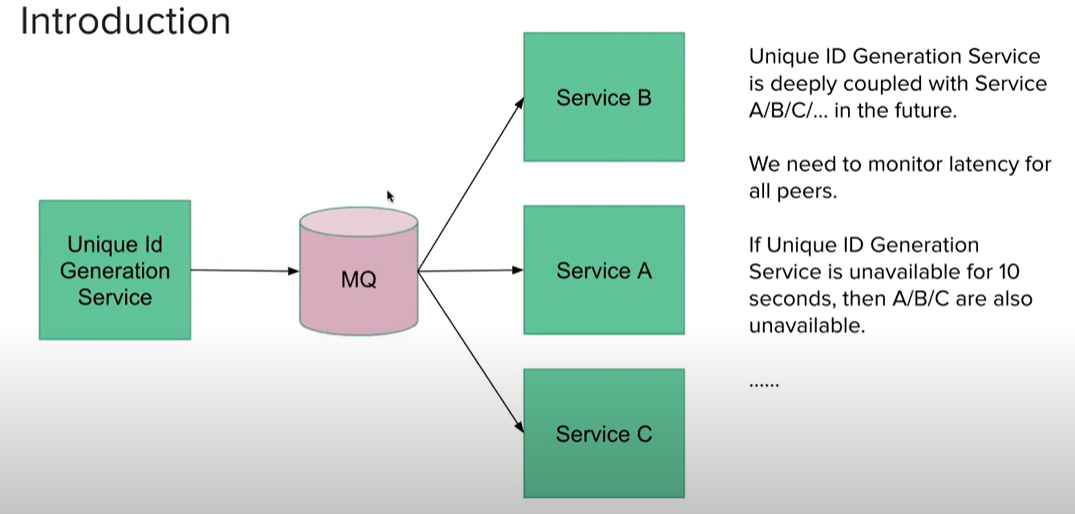

### Example 2. provide support to asynchronous services
* a user registration service receives request, and save the user information to the user DB and response to the user about the successful registration
* at the same time, it will send a meesage to message queue that will be consumed by several services asynchronously
* this decouples the user registration process from the other services such that users will not have to wait for the response from the downstream services

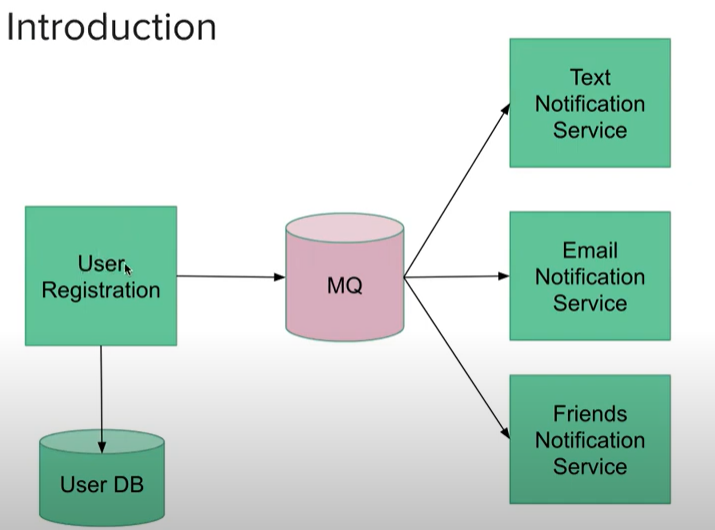

### Advantages
* decoupling
  + decouple the dependency between producer and consumer so that each component can scale up and work independently
    + the work flow will not be limited by the slowest service, and we can process more fast service tasks
    + if one service is broken it won't break the entire work flow 
    + producer only responsible for talking to queue, and same for consumer. In addition they can be implemented by different technology
    + if consumer fails, we still have messages stored in the queue    
* performance
  + faster response time to users since the producer doesn't need to wait for the response from the consumer
* peak clipping
  + mitigate peak QPS using asychronous calls so that consumer can process the requests at its own pace

### Disadvantages
* introduces complexity to the system
  + need to maintain and coordinate message queue
  + how to prevent the same message being processed twice?
  + how to handle the message lost?
  + increases the latency of the system
* inconsistency
  + producer is not sure if the message has been processed successfully
* availability
  + what if message queue is down?
  
### Message models
* message queue
  + you want messages to be processed exactly once
  + asynchronous action
  + messages are delivered out of order (support retries)
* publisher/subscriber (pub/sub)
  + you want to notify multiple services about an event
  + at least once delivery
  + messages are always in order
* most queue services support both mehtods/models  
  
### Reliability and Availability
* Message persistence: messages are persist on disks
* Queue contents(message) replication for redundancy

### RabbitMQ
* overview
  + based on AMQP protocol
  + producer(s) generate messages with routing keys that are sent to exchange
  + exchange distribute and route messages to different queue using routing keys
  + messages are stored until consumer retrieves them
  + consumers are subscribed to different queues and will process the messages from the corresponding queue
  + use cases
    + offload heavy tasks, which are usually in background, such as payment processing, image resizing etc.
    + distribute tasks to multiple services to distribue workloads
  + The architecture of RabbitMQ is shown below
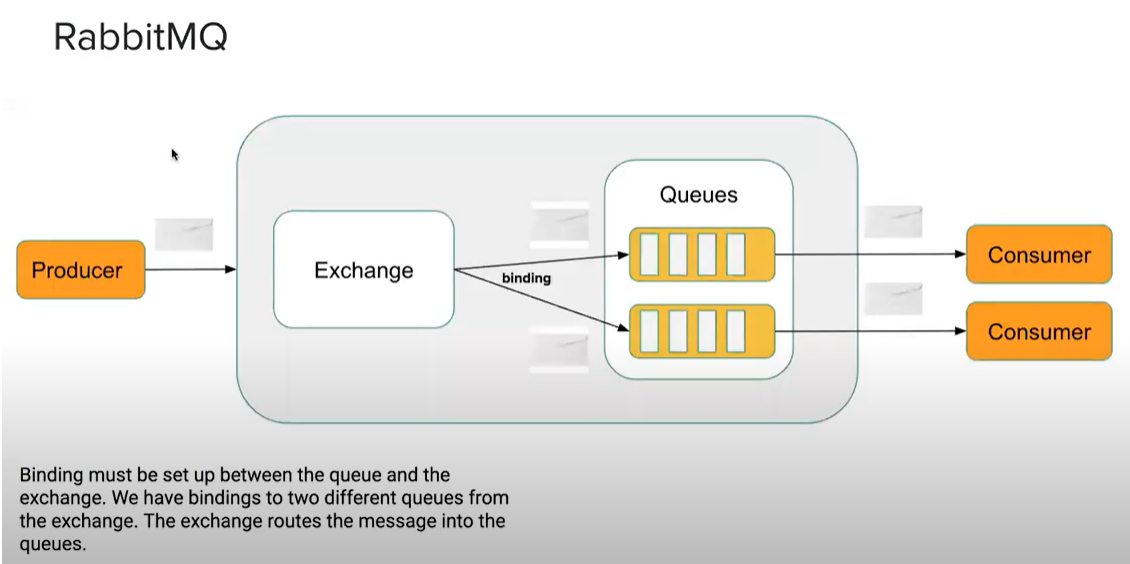

* Exchange in RabbitMQ
  + message queue model
    + direct exchange: route messages to the specified queue name 
    + topic exchange: route messages to the specified topic (payment:tw)
    + header exchange: route messages to the specified header (headers:tw)
  + pub/sub model
    + fan-out exchange: route messages to multiple queues
    
* channels 
  + RabbitMQ consumers use TCP connections estabished to they established to the queue
  + a consumer service can establish multiple connections from different threads, but TCP connections are expensive
  + RabbitMQ can use channels in the same TCP connection. Each channel is run by a thread
  
* acknowledgement
  + consumer send acknowledgement then queue will delete the message
  
* Summary
  + best used as message queue
  + also support pub/sub function
  + provides reliability through acknowledgement
  + provides concurrency through channels

### Kafka
* overview
  + most popular pub/sub system
  + event-streaming plaform 
  + message is called an event. Each event has a key, value and timestamp
  + topics are sharded. Each event is sent to different shards
  
* architecture
  + the architecture of Kafka is shown below
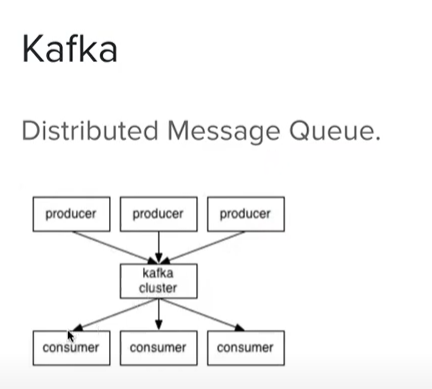

  + producers generate messages and push the messages to brokers
  + messages are stored for a period of time and are partitioned by keys
  + has as many partitions as the number of consumer instances
  + consumers pull messages from brokers
    + only consumers subscribed to a partition will get the events from that partition
  + zookeeper cluster manage the cluster configuration and operation
  + more partitions improves the throughput, but also increase the latency  
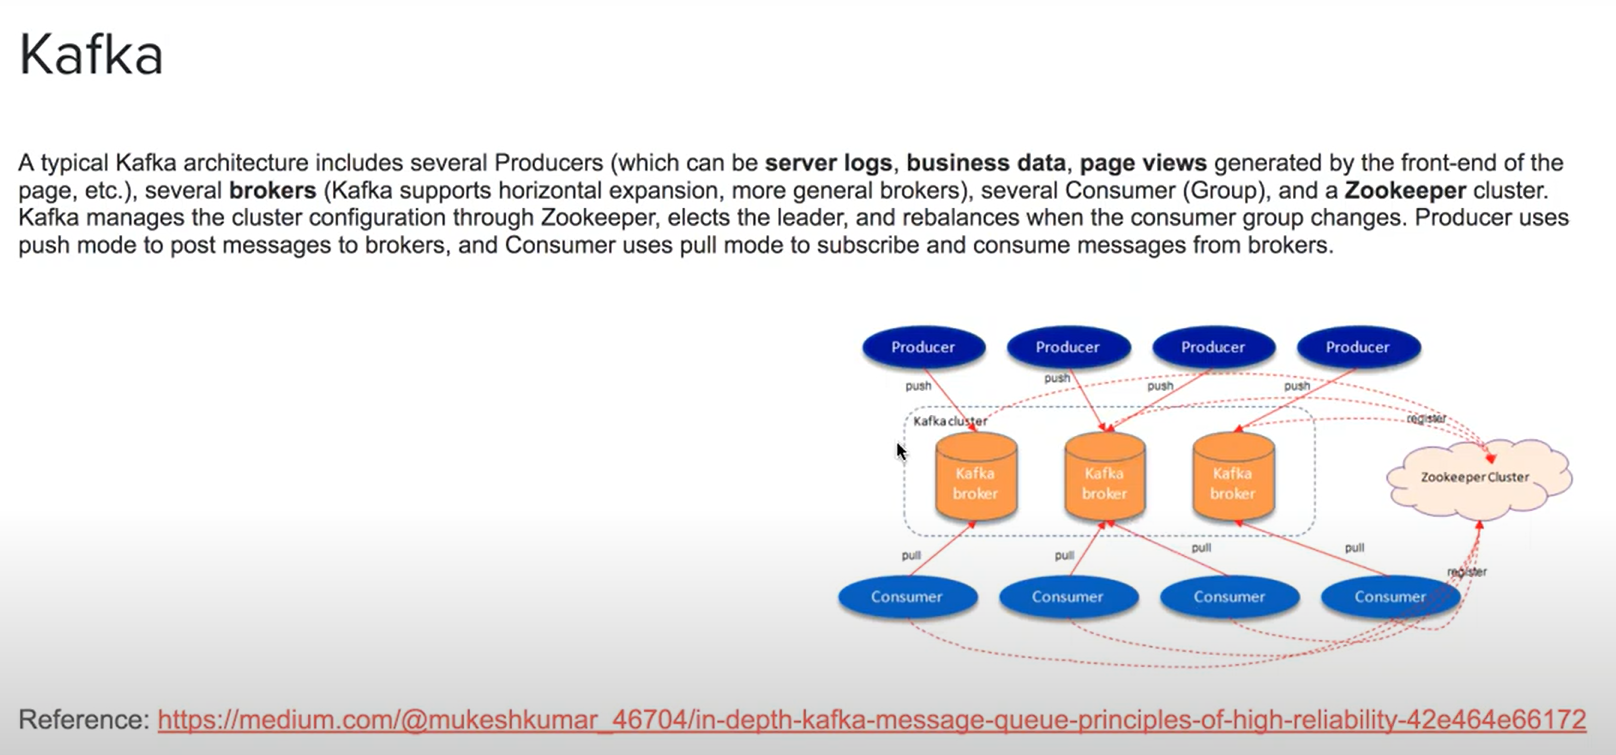

* consumer groups
  + all instances of the same service will have the same consumer group
  + different services will have differnt consumer groups
  + each specific message will only be sent to one instance within the consumer group
  + different consumer groups can start to consume the message from the same topic with different consumer offsets
  
* Summary
  + best used as pub/sub to send messages to multiple consumer groups at once
  + due to its architecture, provides high throughput of above 100 thousand events/sec to multiple consumers
  + slow consumer don't affect queue performance

### Comparison of RabbitMQ and Kafka
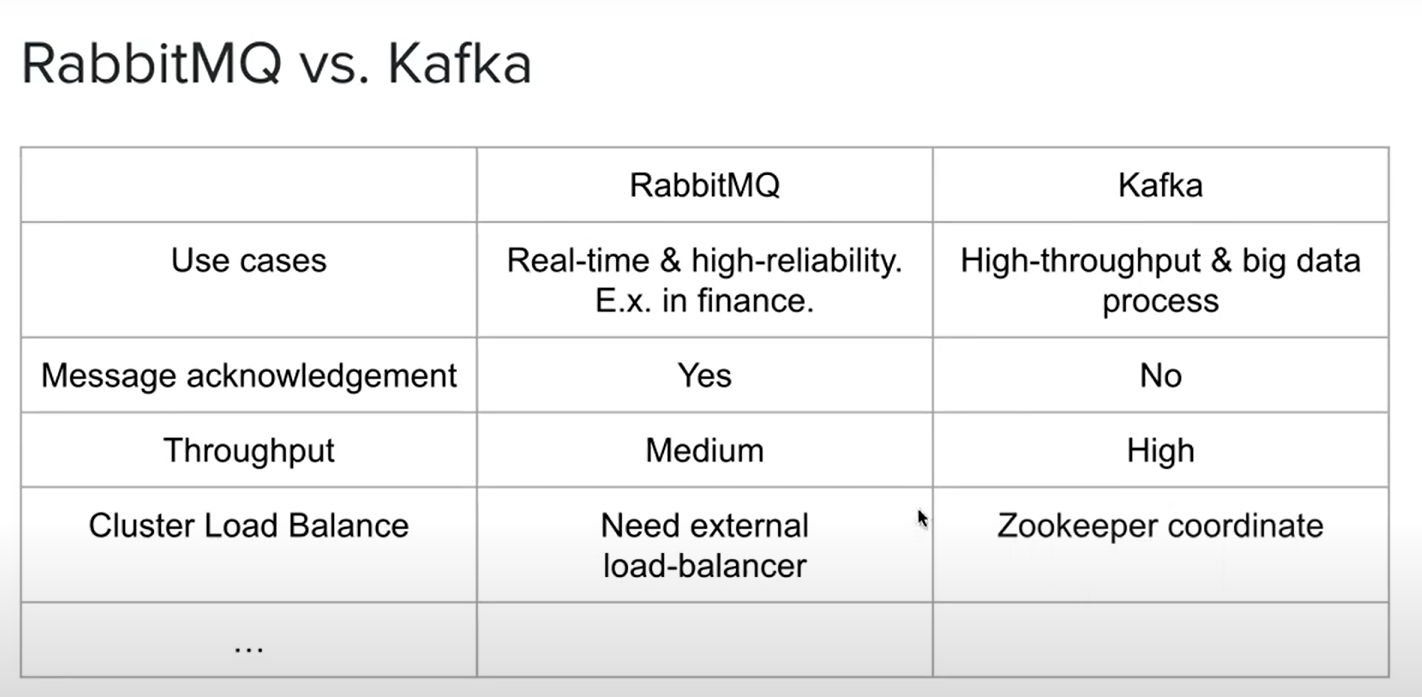



### How to make sure the message will not lost in queue?
* message queue is used to decouple the components to improve the high usability and performance
  + reduce the impact of the upstream and downstream components on the system by decoupling
  + when request peak happens, MQ can buffer the requests for the downstream component to process request at its space
  + two problems
    + messages are lost
      + how to check if messages are lost
        + sender: recieve the ack
        + broker: backup the message by broker
        + consumer: send ack only after processing
      + how would the message get lost / mechanism
      + how to prevent message loss
    + messages build up in the queue
  